# H1-B VISA DATA ANALYSIS

# Members: Pranav Sonawane, Omkar Kadgi



# Section 1: Introduction

Our project focuses on exploring and analyzing important factors, such as geography information, industry, company and position information that influence the Labor Condition Application. We want to uncover insights that can help employers understand the process of getting their LCA approved.

The H-1B Dataset selected for this project contains data from employer’s Labor Condition Application and the case certification determinations processed by the Office of Foreign Labor Certification (OFLC)
The Labor Condition Application (LCA) is a document that a prospective H-1B employer files with the U.S. Department of Labor Employment and Training Administration (DOLETA) when it seeks to employ non-immigrant workers at a specific job occupation in an area of intended employment for not more than three years.

Some of the questions we aim to answer by performing our analysis are:

● What are the types of occupational categories that are more likely to hire non-immigrant workers under the H-1B visa program?

● Does average salary for jobs under the H-1B visa program vary largely among different job positions?

● What are the top 20 employers that put in the greatest number of Labor Condition Applications for their H1B candidates in the U.S.?

● How does the number of Labor Condition Applications vary by different states in the US?

● Does having a H1B dependent employer affect the case status of the Labor Condition Application? 


## Section 2: Milestones and Progress (Markdown)


One of our first tasks for us was to clean the data. Data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database to improve the quality of data. Data cleaning refers to identifying incomplete, incorrect, inaccurate, and irrelevant parts of the data and then replacing, modifying, or deleting that data.

This involved various milestones which were:
Managing missing data: Missing values negatively affect the quality of prediction. Our dataset had many attributes with missing values. Our data comes from the Labor Certification Application. Some of the attributes did not apply to the majority of the applicants and were left blank thus creating missing values. We determined the attributes with more than 80% of the values missing and removed those attributes. The following attributes had more than 80% of missing values:

• AGENT_ATTORNEY_NAME

• AGENT_ATTORNEY_CITY

• AGENT_ATTORNEY_STATE

• ORIGINAL_CERT_DATE
 
Data selection : 

The dataset we found is huge with numerous columns and thousands of rows. This provides us with the opportunity to perform various types of analysis. But on the other hand, dealing with such big data can be quite confusing and we can end up getting lost.
To ensure that we do meaningful analysis, we as a team decided to do the analysis on a more focused set of data and generate observations that are significant and insightful as we delve deeper in the project. This involved us doing a cautious data selection:
Some of the attributes we have selected are :

• WORKSITE_STATE

• JOB_TITLE

• FULL_TIME_POSITION

• EMPLOYER_CITY

• PREVAILING_WAGE


Reshaping data : 

A lot of the data entries we had were not in the same format. For example, the units of pay of the employees were given in ‘week’, ‘hours’, ‘month’, ‘year’ etc. Performing data analysis on this data would give wrong insights. Therefore, we had to transform the data into a single unit. 
The hourly pay conversion takes a lot of time. So, we have done the following stages after outliers were removed.
Monthly pay is multiplied by 12. (as we have 12 months in a year)
Weekly pay is multiplied by 48. (as we have 52 weeks in a year)
Bi-Weekly pay is multiplied by 24. (As we have two bi-weeks in a year
Lastly, we replace the names i.e. bi-weekly, month and week with year.


Data transformation :

The data we have now has a better structure but still lacks useability. Columns such as EMPLOYMENT_START_DATE only contain dates in “string” type, which does not provide an idea for actual time duration. Therefore, to make our analysis easier, we first changed date columns to “datatime” type. Then “timedelta” variables were created by subtracting two different “datatime” variables. Lastly, we applied timedelta attributes to extract the number of days and put them into new columns. At the end, we were able to create new columns that would be helpful for the data analysis part.
The two new variables are : 

• DECISION_DURATION 

• EMPLOYMENT_DURATION 


# Section 2: Choice for Heavier Grading on Data Analysis 

We would like our project to be graded heavily on Data Analys. We have various features that affects the status of LCA being approved, there are many questions that revolve around it and we have to bo beyond the regular data analysis such as finding the highest or the lowest salary or the top sponsoring employers. There are relationships between features which needs to be adressed approriately to make sense out of the data.

# Section 3: Data Processing 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)
from plotly import tools
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

### Loading the data

In [2]:
df=pd.read_csv('H-1B_Disclosure_Data_FY17.csv')

In [ ]:
# lets have an overview of the data
df.head(5)

,Unnamed: 0,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,0,I-200-16055-173457,CERTIFIED-WITHDRAWN,2016-02-24,2016-10-01,H-1B,2016-08-10,2019-08-10,DISCOVER PRODUCTS INC.,NaN,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-01
1,1,I-200-16064-557834,CERTIFIED-WITHDRAWN,2016-03-04,2016-10-01,H-1B,2016-08-16,2019-08-16,DFS SERVICES LLC,NaN,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-08
2,2,I-200-16063-996093,CERTIFIED-WITHDRAWN,2016-03-10,2016-10-01,H-1B,2016-09-09,2019-09-09,EASTBANC TECHNOLOGIES LLC,NaN,...,Y,N,Y,NaN,NaN,WASHINGTON,NaN,DC,20007,2016-03-16
3,3,I-200-16272-196340,WITHDRAWN,2016-09-28,2016-10-01,H-1B,2017-01-26,2020-01-25,INFO SERVICES LLC,NaN,...,Y,N,Y,NaN,NaN,JERSEY CITY,HUDSON,NJ,07302,NaN
4,4,I-200-15053-636744,CERTIFIED-WITHDRAWN,2015-02-22,2016-10-02,H-1B,2015-03-01,2018-03-01,BB&T CORPORATION,NaN,...,N,N,NaN,Y,NaN,NEW YORK,NEW YORK,NY,10036,2015-02-26


We focus on H1-B visa and Employers from USA only. Since we want only the US data, the first thing to do is examining the country column and dealing with its missing values. With EMPLOYER_STATE existing, natrually, EMPLOYER_COUNTRY should be 'UNITED STATES OF AMERICA'.


In [ ]:
# if EMPLOYER_STATE is not null, EMPLOYER_COUNTRY is UNITED STATES OF AMERICA
# define a function to generate 'UNITED STATES OF AMERICA' when 'EMPLOYER_STATE' exists
# apply that function to the dataframe

def impute_country(col):
    state = col[0]
    country = col[1]
    if pd.isnull(country):
        if pd.notnull(state):
            return 'UNITED STATES OF AMERICA'
    else:
        return country

df['EMPLOYER_COUNTRY'] = df[['EMPLOYER_STATE','EMPLOYER_COUNTRY']].apply(impute_country, axis=1)

Now select only the data of USA's H1-B visa, losing few foreign data points.

In [ ]:
#df.VISA_CLASS.value_counts()
#df.EMPLOYER_COUNTRY.value_counts()
df = df[df.VISA_CLASS == 'H-1B']
df= df[df.EMPLOYER_COUNTRY == 'UNITED STATES OF AMERICA']

Check for number of unique values each column has

In [ ]:
df.apply(lambda x:len(x.unique()))

Unnamed: 0                     610286
CASE_NUMBER                    610286
CASE_STATUS                         4
CASE_SUBMITTED                   1321
DECISION_DATE                     357
VISA_CLASS                          1
EMPLOYMENT_START_DATE            1599
EMPLOYMENT_END_DATE              1645
EMPLOYER_NAME                   66982
EMPLOYER_BUSINESS_DBA            8695
EMPLOYER_ADDRESS                60924
EMPLOYER_CITY                    5004
EMPLOYER_STATE                     56
EMPLOYER_POSTAL_CODE            10705
EMPLOYER_COUNTRY                    1
EMPLOYER_PROVINCE                 290
EMPLOYER_PHONE                  77543
EMPLOYER_PHONE_EXT               1400
AGENT_REPRESENTING_EMPLOYER         3
AGENT_ATTORNEY_NAME              6499
AGENT_ATTORNEY_CITY              1067
AGENT_ATTORNEY_STATE               56
JOB_TITLE                       89072
SOC_CODE                          706
SOC_NAME                          837
NAICS_CODE                       2710
TOTAL_WORKER

### Dealing with missing data

Check for columns with missing values, and the number of missing values of each column.

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

EMPLOYMENT_START_DATE              23
EMPLOYMENT_END_DATE                23
EMPLOYER_NAME                      49
EMPLOYER_BUSINESS_DBA          568649
EMPLOYER_ADDRESS                    2
EMPLOYER_CITY                      10
EMPLOYER_POSTAL_CODE               12
EMPLOYER_PROVINCE              604292
EMPLOYER_PHONE                  92936
EMPLOYER_PHONE_EXT             582820
AGENT_REPRESENTING_EMPLOYER     92938
AGENT_ATTORNEY_CITY            266799
AGENT_ATTORNEY_STATE           281579
JOB_TITLE                           4
SOC_CODE                            1
SOC_NAME                            2
NAICS_CODE                          2
FULL_TIME_POSITION                  4
PREVAILING_WAGE                     1
PW_UNIT_OF_PAY                     31
PW_WAGE_LEVEL                  119455
PW_SOURCE                          30
PW_SOURCE_YEAR                     30
PW_SOURCE_OTHER                  5930
WAGE_RATE_OF_PAY_TO                 1
WAGE_UNIT_OF_PAY                    7
H1B_DEPENDEN

Imputing missing data for important columns.

In [ ]:
# There are situations where a company does not set levels for wage. Catagorize these companies together.
# Adding a new catagory to 'PW_SOURCE' and 'PW_SOURCE_YEAR' as 'Not known'

df['FULL_TIME_POSITION'].fillna('No Answer',inplace = True)
df['PW_WAGE_LEVEL'].fillna('No Level',inplace = True)
df['PW_SOURCE'].fillna('Not known',inplace = True)
df['PW_SOURCE_YEAR'].fillna('Not known',inplace = True)
#df['PW_SOURCE_OTHER'].fillna('Not known',inplace = True)
#df.isnull().sum()[df.isnull().sum() > 0]

In [ ]:
# if agent name is ',', no agent
# Without agent name, we assume no agent is hired for a company to apply for H-1B

def impute_agent(col):
    represent = col[0]
    attorney = col[1]
    if pd.isnull(represent):
        if attorney == ',':
            return 'N'
    else:
        return represent
    
df['AGENT_REPRESENTING_EMPLOYER'] = df[['AGENT_REPRESENTING_EMPLOYER', 'AGENT_ATTORNEY_NAME']].apply(impute_agent, axis=1)

### Data selection

Selecting columns we want and check for null values.

In [ ]:
to_select=['CASE_NUMBER','CASE_STATUS','CASE_SUBMITTED','DECISION_DATE','VISA_CLASS','EMPLOYMENT_START_DATE','EMPLOYMENT_END_DATE','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','EMPLOYER_COUNTRY','AGENT_REPRESENTING_EMPLOYER','JOB_TITLE','SOC_CODE','SOC_NAME','NAICS_CODE','TOTAL_WORKERS','NEW_EMPLOYMENT','CONTINUED_EMPLOYMENT','CHANGE_PREVIOUS_EMPLOYMENT','NEW_CONCURRENT_EMPLOYMENT','CHANGE_EMPLOYER','AMENDED_PETITION','FULL_TIME_POSITION','PREVAILING_WAGE','PW_UNIT_OF_PAY','PW_WAGE_LEVEL','PW_SOURCE','PW_SOURCE_YEAR','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','H1B_DEPENDENT','WILLFUL_VIOLATOR','WORKSITE_CITY','WORKSITE_COUNTY','WORKSITE_STATE']

 
#to_remove=['PW_WAGE_LEVEL','PW_SOURCE_OTHER','AGENT_ATTORNEY_NAME', 'EMPLOYER_POSTAL_CODE','EMPLOYER_PROVINCE', 'EMPLOYER_PHONE_EXT','EMPLOYER_PHONE','WORKSITE_POSTAL_CODE','EMPLOYER_ADDRESS','EMPLOYER_PHONE','ORIGINAL_CERT_DATE','EMPLOYER_BUSINESS_DBA','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE']
df = df[to_select]
df.isnull().sum()[df.isnull().sum() > 0]


EMPLOYMENT_START_DATE      23
EMPLOYMENT_END_DATE        23
EMPLOYER_NAME              49
EMPLOYER_CITY              10
JOB_TITLE                   4
SOC_CODE                    1
SOC_NAME                    2
NAICS_CODE                  2
PREVAILING_WAGE             1
PW_UNIT_OF_PAY             31
WAGE_RATE_OF_PAY_TO         1
WAGE_UNIT_OF_PAY            7
H1B_DEPENDENT               3
WILLFUL_VIOLATOR            3
WORKSITE_CITY              10
WORKSITE_COUNTY          1136
WORKSITE_STATE              8
dtype: int64

### Dropping the useless columns.
By examining the above two columns we can remove all the useless columns which has majority of null values in it.
Since we have a lot of those columns to drop, we will instead select the ones we need.

Dropping missing values
since now only a few values are null (< 0.007%) in the required rows, we can drop them.

In [ ]:
df.dropna(inplace=True)
len(df)

609019

Convert the EMPLOYMENT_START_DATE to pandas date time format¶


In [ ]:
#df['EMPLOYMENT_START_DATE'] = pd.to_datetime(df['EMPLOYMENT_START_DATE'])

The following cell shows us how the wage is varied.
One might notice some abornmal values like the max hourly pay as 2017,143166 etc etc.
That is because the data is formatted into different levels, that is hourly, weekly or biweekly wage levels. 

### Reshaping Data: 

In [ ]:
df.groupby(['FULL_TIME_POSITION','PW_UNIT_OF_PAY']).describe()['PREVAILING_WAGE']


count          mean            std  \
FULL_TIME_POSITION PW_UNIT_OF_PAY                                          
N                  Hour             13317.0     32.618121      23.788562   
                   Year                14.0  70026.142857   29231.538086   
No Answer          Year                 3.0  54426.666667    6244.428663   
Y                  Bi-Weekly           45.0   9145.600889   24956.450419   
                   Hour             23825.0    307.019317    4350.660740   
                   Month              295.0   8023.570644   16339.188872   
                   Week               113.0   4143.821770   12832.266642   
                   Year            571407.0  77779.884189  268309.376067   

                                        min       25%       50%       75%  \
FULL_TIME_POSITION PW_UNIT_OF_PAY                                           
N                  Hour                7.25     22.81     27.96     35.74   
                   Year            30306.00  50772.50  62348.00  86424.00   
No Answer          Year            50294.00  50835.00  51376.00  56493.00   
Y                  Bi-Weekly         700.00   2064.09   2446.46   4120.00   
                   Hour                0.00     26.43     32.52     39.43   
                   Month               0.00   3206.00   4135.00   5968.00   
                   Week                0.00    943.20   1135.19   1463.84   
                   Year                0.00  60029.00  71843.00  90376.00   

                                           max  
FULL_TIME_POSITION PW_UNIT_OF_PAY               
N                  Hour                 2017.0  
                   Year               135387.0  
No Answer          Year                61610.0  
Y                  Bi-Weekly          145000.0  
                   Hour               192962.0  
                   Month              148283.0  
                   Week                74734.0  
                   Year            201622735.0

### Data Transformation:

To make our analysis easy we first convert the Monthly, Weekly and Bi-weekly pay to Annual pay so that it is in a uniform scale.

The hourly pay conversion takes a lot of time. So, we have done in following stages after outliers were removed.

Montly pay is multiplied by 12. (as we have 12 months in a year)

Weekly pay is multiplied by 52. (as we have 52 weeks in a year)

Bi-Weekly pay is multiplied by 26. (as we have two bi-weeks in a month)

Hourly pay is multiplied by 20 * 52. (as we have 20 hours per week and 52 weeks per year)

Lastly, we replace the names i.e. bi-weekly, month and week with year.


In [ ]:
for i in df.index:   
        if df.loc[i,'PW_UNIT_OF_PAY'] == 'Month':
            df.loc[i,'PREVAILING_WAGE'] = df.loc[i,'PREVAILING_WAGE'] * 12
        if df.loc[i,'PW_UNIT_OF_PAY'] == 'Week':
            df.loc[i,'PREVAILING_WAGE'] = df.loc[i,'PREVAILING_WAGE'] * 52
        if df.loc[i,'PW_UNIT_OF_PAY'] == 'Bi-Weekly':
            df.loc[i,'PREVAILING_WAGE'] = df.loc[i,'PREVAILING_WAGE'] * 26
        if df.loc[i,'PW_UNIT_OF_PAY'] == 'Hour':
            df.loc[i,'PREVAILING_WAGE'] = df.loc[i,'PREVAILING_WAGE'] * 20 * 52
            
df.PW_UNIT_OF_PAY.replace(['Bi-Weekly','Month','Week', 'Hour'],['Year','Year','Year', 'Year'], inplace=True)

In [ ]:
df['PREVAILING_WAGE'].describe()

count    6.090190e+05
mean     8.631527e+04
std      9.331743e+05
min      0.000000e+00
25%      5.726200e+04
50%      7.022100e+04
75%      8.862900e+04
max      2.016227e+08
Name: PREVAILING_WAGE, dtype: float64

In [ ]:
df['PREVAILING_WAGE_THOUSAND'] = df['PREVAILING_WAGE'] / 1000
df['PREVAILING_WAGE_THOUSAND'].describe()

count    609019.000000
mean         86.315274
std         933.174310
min           0.000000
25%          57.262000
50%          70.221000
75%          88.629000
max      201622.735000
Name: PREVAILING_WAGE_THOUSAND, dtype: float64

In [ ]:
df.duplicated(subset = 'CASE_NUMBER').sum()

0

Creating new variables, such as Decision Duration that calculates the time difference between date applied and the date a decision was given. It helps us to understand the decision timeline.

In [ ]:
# create column that record the decision duration
df['CASE_SUBMITTED_DT'] = pd.to_datetime(df['CASE_SUBMITTED'])
df['DECISION_DATE_DT'] = pd.to_datetime(df['DECISION_DATE'])
df['DECISION_DURATION_DT'] = df['DECISION_DATE_DT'] - df['CASE_SUBMITTED_DT']
df['DECISION_DURATION'] = df['DECISION_DURATION_DT'].map(lambda d: d.days)

df.drop('CASE_SUBMITTED_DT', axis=1, inplace = True)
df.drop('DECISION_DATE_DT', axis=1, inplace = True)
df.drop('DECISION_DURATION_DT', axis=1, inplace = True)
df.head(5)

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,...,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,PREVAILING_WAGE_THOUSAND,DECISION_DURATION
0,I-200-16055-173457,CERTIFIED-WITHDRAWN,2016-02-24,2016-10-01,H-1B,2016-08-10,2019-08-10,DISCOVER PRODUCTS INC.,RIVERWOODS,IL,...,65811.0,67320.0,Year,N,N,RIVERWOODS,LAKE,IL,59.197,220
1,I-200-16064-557834,CERTIFIED-WITHDRAWN,2016-03-04,2016-10-01,H-1B,2016-08-16,2019-08-16,DFS SERVICES LLC,RIVERWOODS,IL,...,53000.0,57200.0,Year,N,N,RIVERWOODS,LAKE,IL,49.800,211
3,I-200-16272-196340,WITHDRAWN,2016-09-28,2016-10-01,H-1B,2017-01-26,2020-01-25,INFO SERVICES LLC,LIVONIA,MI,...,102000.0,0.0,Year,Y,N,JERSEY CITY,HUDSON,NJ,90.376,3
4,I-200-15053-636744,CERTIFIED-WITHDRAWN,2015-02-22,2016-10-02,H-1B,2015-03-01,2018-03-01,BB&T CORPORATION,WILSON,NC,...,132500.0,0.0,Year,N,N,NEW YORK,NEW YORK,NY,116.605,588
5,I-200-15071-336195,CERTIFIED-WITHDRAWN,2015-03-12,2016-10-02,H-1B,2015-09-11,2018-09-11,"SUNTRUST BANKS, INC.",ATLANTA,GA,...,71750.0,0.0,Year,N,N,ATLANTA,FULTON,GA,59.405,570


In [ ]:
df['DECISION_DURATION'].describe()

count    609019.000000
mean         35.936923
std         137.556014
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max        2214.000000
Name: DECISION_DURATION, dtype: float64

Creating a new variable, Employment Duration, which calculates the number of days the employee was employed for with the company sponsoring them.

In [ ]:
df['EMPLOYMENT_START_DATE_DT'] = pd.to_datetime(df['EMPLOYMENT_START_DATE'])
df['EMPLOYMENT_END_DATE_DT'] = pd.to_datetime(df['EMPLOYMENT_END_DATE'])
df['EMPLOYMENT_DURATION_DT'] = df['EMPLOYMENT_END_DATE_DT'] - df['EMPLOYMENT_START_DATE_DT']
df['EMPLOYMENT_DURATION'] = df['EMPLOYMENT_DURATION_DT'].map(lambda d: d.days)

df.drop('EMPLOYMENT_START_DATE_DT', axis=1, inplace = True)
df.drop('EMPLOYMENT_END_DATE_DT', axis=1, inplace = True)
df.drop('EMPLOYMENT_DURATION_DT', axis=1, inplace = True)
df.head(5)

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,...,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,PREVAILING_WAGE_THOUSAND,DECISION_DURATION,EMPLOYMENT_DURATION
0,I-200-16055-173457,CERTIFIED-WITHDRAWN,2016-02-24,2016-10-01,H-1B,2016-08-10,2019-08-10,DISCOVER PRODUCTS INC.,RIVERWOODS,IL,...,67320.0,Year,N,N,RIVERWOODS,LAKE,IL,59.197,220,1095
1,I-200-16064-557834,CERTIFIED-WITHDRAWN,2016-03-04,2016-10-01,H-1B,2016-08-16,2019-08-16,DFS SERVICES LLC,RIVERWOODS,IL,...,57200.0,Year,N,N,RIVERWOODS,LAKE,IL,49.800,211,1095
3,I-200-16272-196340,WITHDRAWN,2016-09-28,2016-10-01,H-1B,2017-01-26,2020-01-25,INFO SERVICES LLC,LIVONIA,MI,...,0.0,Year,Y,N,JERSEY CITY,HUDSON,NJ,90.376,3,1094
4,I-200-15053-636744,CERTIFIED-WITHDRAWN,2015-02-22,2016-10-02,H-1B,2015-03-01,2018-03-01,BB&T CORPORATION,WILSON,NC,...,0.0,Year,N,N,NEW YORK,NEW YORK,NY,116.605,588,1096
5,I-200-15071-336195,CERTIFIED-WITHDRAWN,2015-03-12,2016-10-02,H-1B,2015-09-11,2018-09-11,"SUNTRUST BANKS, INC.",ATLANTA,GA,...,0.0,Year,N,N,ATLANTA,FULTON,GA,59.405,570,1096


In [ ]:
df['EMPLOYMENT_DURATION'].describe()

count    609019.000000
mean       1056.331004
std         150.315278
min       -2558.000000
25%        1094.000000
50%        1095.000000
75%        1095.000000
max        1460.000000
Name: EMPLOYMENT_DURATION, dtype: float64

In [ ]:
# delete the outlier value, i.e employment days less than 0.
df = df[df['EMPLOYMENT_DURATION'] > 0]
df['EMPLOYMENT_DURATION'].describe()

count    609018.000000
mean       1056.336939
std         150.244035
min           1.000000
25%        1094.000000
50%        1095.000000
75%        1095.000000
max        1460.000000
Name: EMPLOYMENT_DURATION, dtype: float64

# Section 4: Data Analysis

### Question 1: What are the top 10 employers that put in the greatest number of Labor Condition Applications for their H1B candidates in the U.S.?

The first question that comes to everyone's mind when they look at H1B data, is that which companies have the highest number of immigrant workers, which companies are ready to sponsor immigrants. Immigrant workers are on tight immigrantion rules and have to look for employers who can sponsor them. This analysis helps prospective candidates directly find companies they should be targeting to have a prolonged stay in the US. 


We use the EMPLOYER_NAME and a count variables that captures the number of applications filed by each employer. We have visualized this analysis by using a simple bar chart, to understand the frequency of applications among different employers.

In [ ]:
df['countvar'] = 1
dftop = df.groupby('EMPLOYER_NAME',as_index=False).count()
dftop = dftop.sort_values('countvar',ascending= False)[['EMPLOYER_NAME','countvar']][0:10]
t1 = go.Bar(x=dftop.EMPLOYER_NAME.values,y=dftop.countvar.values,name='top10')
layout = go.Layout(dict(title= "TOP 10 EMPLOYERS SPONSORING",yaxis=dict(title="Number of applications")))
data = [t1]
fig =go.Figure(data,layout)
fig.update_xaxes(tickangle=90, tickfont=dict(size=8))
iplot(fig)


In [ ]:
dfempst = df.groupby('EMPLOYER_STATE',as_index=False).count()[['EMPLOYER_STATE','countvar']].sort_values('countvar',ascending=False)
data=[dict(
    type='choropleth',
    locations = dfempst.EMPLOYER_STATE,
    z = dfempst.countvar,
    locationmode = 'USA-states',marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of applications")
)]
layout= dict(title="2017-2018 H1B VISA APPLICATIONS ( EMPLOYER STATE)",geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
iplot(fig)

### Question 3 : What are the types of occupational categories that are more likely to hire non-immigrant workers under the H-1B visa program?

We aim to look at occupational categories in this dataset. The first instinct is to analyze the column SOC_NAME, which contains different occupation names. However, string representation that may gives inaccurate result. For example, "Management Analysts" and "Management Analyst" represent the same occupation but spell slightly different. If we use value count on column SOC_NAME, then we will see that "Management Analysts" has a count of 12607, but in fact it should be at least 12933 (12607+326).

To answer this question , we will first apply value count on SOC_CODE and then find the corresponding occupation names.

In [ ]:
print(len(df[df['SOC_NAME'] == 'MANAGEMENT ANALYSTS']))
print(len(df[df['SOC_NAME'] == 'MANAGEMENT ANALYST']))

12607
326


In [ ]:
df[df['SOC_CODE'] == '15-1121']['SOC_NAME'].value_counts()

COMPUTER SYSTEMS ANALYSTS           92691
COMPUTER SYSTEMS ANALYST            16866
COMPUTER SYSTEM ANALYSTS               40
COMPUTER SYSTEM ANALYST                 3
SOFTWARE DEVELOPER, APPLICATIONS        3
COMPUTER PROGRAMMERS                    2
COMPUTER SYTSEMS ANALYSTS               1
COMPUTER SYSTEMS ANALYTS                1
SOFTWARE DEVELOPERS,APPLICATIONS        1
COMPUTER SYSTEMS ANLYSTS                1
COMPUTER SYTEMS ANALYSTS                1
15-1121                                 1
BUSINESS SYSTEMS ANALYTS                1
Name: SOC_NAME, dtype: int64

In [ ]:
# Among all certified cases, find the most frequent occupational codes
df_certified = df[df['CASE_STATUS'] == 'CERTIFIED']
df_soc = df_certified['SOC_CODE'].value_counts().head(10).to_frame().reset_index().rename(columns={"index": "SOC_CODE", "SOC_CODE": "COUNT"})
df_soc['PERCENT'] = round(df_soc['COUNT'] / len(df_certified),3)

In [ ]:
# Find the corresponding SOC_NAME
soc_code_list = df_soc['SOC_CODE']
df_soc['SOC_NAME'] = np.nan

for i in range(10):  
    name = df[df['SOC_CODE'] == soc_code_list[i]]['SOC_NAME'].value_counts().reset_index().iloc[0,0]
    df_soc.iloc[i,3] = name
    
df_soc

,SOC_CODE,COUNT,PERCENT,SOC_NAME
0,15-1132,107111,0.201,"SOFTWARE DEVELOPERS, APPLICATIONS"
1,15-1121,99172,0.186,COMPUTER SYSTEMS ANALYSTS
2,15-1131,58014,0.109,COMPUTER PROGRAMMERS
3,15-1199,51849,0.097,"COMPUTER OCCUPATIONS, ALL OTHER"
4,15-1133,16040,0.030,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE"
5,13-1111,11614,0.022,MANAGEMENT ANALYSTS
6,13-2011,10132,0.019,ACCOUNTANTS AND AUDITORS
7,15-1142,9649,0.018,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS
8,17-2141,8466,0.016,MECHANICAL ENGINEERS
9,15-2031,8260,0.016,OPERATIONS RESEARCH ANALYSTS


Visualization

In [ ]:
x = df_soc['SOC_NAME']
y = df_soc['PERCENT']

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
        )])

fig.layout.update(
    title="Top 10 Occupational Categories with Highest Percentage of Certified Cases",
    xaxis_title="Occupation",
    yaxis_title="Percentage of Certified Cases"
)

fig.show()


From above plot, top 5 occupations, which count for 62.3% percentage of certified cases, are all related to computer science field. Therefore, we conclude that, among all certified cases, computer science types of occupations, especially Software Developers, are more likely to hire non-immigrant workers under the H-1B visa program. In addition, Management Analysts, Accountants, Machanical Engineers, and Operations Research Analysts are also occuptions that are more likely to hire non-immigrant workers.

### Question 4: Does average salary for jobs under the H-1B visa program vary largely among different job positions?

SOC stands for Standard Occupational System, in which each job has its unique official name. The column of 'SOC_NAME' contains the official job name for each applicant.

There are over 800 kinds of officially recogonized jobs, which is hard to plot or analyze. We chose to roughly divide the occupations in to the following categories. 

Since it's an official system, all job-names are marked clearly and the data is clean, such as 'Software Developer', 'Biology Scientist', 'Financial Analyst' etc. Simply searching for the key words of jobs would easily catagorize the occupations.

In [ ]:
# Slice the dataset into a smaller, more relavant one for better performance
df_wage = df[['PREVAILING_WAGE', 'PW_WAGE_LEVEL','WORKSITE_STATE', 'JOB_TITLE','SOC_NAME']]

# Convert job names to lower cases for clearance and convenience
df_wage['occupation'] = df_wage['SOC_NAME'].str.lower()

In [ ]:
# Define a function to categorize different occupations
# Apply the function to the column of job names
def job(x):
    if 'computer' in x:
        return 'computer related'
    elif 'financial' in x or 'finance' in x:
        return 'finance related'
    elif 'operation' in x:
        return 'operation related'
    elif 'scientist' in x or 'physicist'in x:
        return 'scientist'
    elif 'market' in x:
        return 'marketing'
    elif 'software' in x:
        return 'software developer'
    elif 'teacher' in x:
        return 'teacher'
    elif 'engineer' in x:
        return 'engineer'
    elif 'database' in x:
        return 'database related'
    elif 'legal' in x:
        return 'legal-issues related'
    elif 'physician' in x or 'physical' in x:
        return 'physicians'
    elif 'lawyer' in x:
        return 'lawyers'
    else:
        return 'other'
    
df_wage['occupation'] = df_wage['occupation'].apply(job)

Text(0.5, 1.0, 'Salary lavel for different occupations')

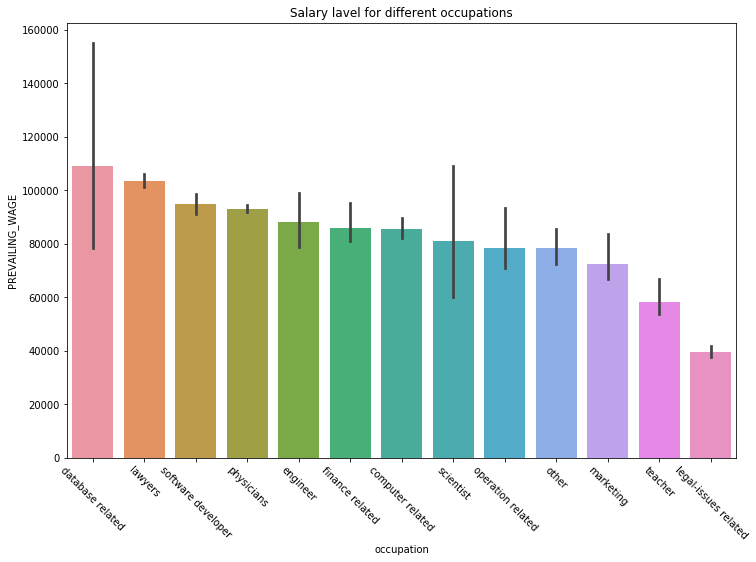

In [ ]:
# Plot the barplot of average salary in each occupation.
# Sort the salaries in each occupation in decending order on the plot
sorting = df_wage.groupby('occupation')['PREVAILING_WAGE'].mean().reset_index().sort_values('PREVAILING_WAGE', ascending=False)

plt.figure(figsize=(12,8))

plot = sns.barplot(x='occupation', y='PREVAILING_WAGE', data=df_wage, order=sorting['occupation'])

for item in plot.get_xticklabels():
    item.set_rotation(315)
    
plot.set_title('Salary lavel for different occupations')

A bar plot is applied in this case for better comparasion.

As illustrated in the plot, on average, database engineers are paid the most, while having the most uncertainties. The gray line on each bar represents 95% confidence level of the average. Database engineers on H-1B application are ususally paid around 110,000 dollars a year, while the actual salary of each one of them fluctuates from around 80,000 to nearly 150,000 dollars per year, which, intuitively, depends on corporation sizes and level of working difficulties.

Speaking of salary stability, one can tell that positions that require less amount of mathmatical capabilities enjoy a more stable salay.

Following the lawyers are software developers, physicians and engineers. These positions require an excessive amount of specialized professional knowledge and mathmatical and logical capabilities, making it reasonable to pay at a higher level. Among techinical positions, software developers enjoy higher level of salaries and a relatively small amount of uncertainties, meaning they usually take on certain amount of works of similarly high difficulties, requiring some creativity while do not rely on that.

In general, technical occupations are paid similarly, around 90,000 dollars per year. As for other positions such as finalcial, marketing or operation-related positions pays slightly less, at around 80,000 per year. These fields require a certain amount of professional knowledge, problem solving abilities and techinical skills, while the level of knowledge is not as prohibiting as highly technical occupations mentioned above.

The teachers on H-1B in this case are generally middle school teachers or secondary school teachers, excluding college professors. As important as they are, the teaching occupations are not paid as high as other jobs, settling at a little over 60,000 per year. Legal-related occupations that require least amount of mathmatical abilities are paid even less.

To sum up, traiditionally admired positions such as doctors, scientists, lawyers and engineers are paid the most. And only technical positions have the ability to compete with them in salary.

### Question 5: Which occupations are more likely to be certified with H-1B? How do they pay?

In [ ]:
# create a dataframe, recording the likelihood of getting certified
df_certified_soc_count = df[df['CASE_STATUS'] == 'CERTIFIED']['SOC_CODE'].value_counts().reset_index().rename(columns={"index": "SOC_CODE", "SOC_CODE": "COUNT"})
df_full_soc_count = df['SOC_CODE'].value_counts().reset_index().rename(columns={"index": "SOC_CODE", "SOC_CODE": "COUNT"})

df_count_soc = pd.merge(df_certified_soc_count, df_full_soc_count, on='SOC_CODE', suffixes=('_cerfified', '_full'))
df_count_soc['likelihood'] = df_count_soc['COUNT_cerfified']/df_count_soc['COUNT_full']
df_likelihood_soc = df_count_soc[['SOC_CODE', 'likelihood']]

In [ ]:
# Create a new dataframe containing the top 10 popular official jobs.
df_soc = df['SOC_CODE'].value_counts().head(10).to_frame().reset_index().rename(columns={"index": "SOC_CODE", "SOC_CODE": "COUNT"})

# save the top 10 job code, waiting to be filled with names
soc_code_list = df_soc['SOC_CODE']
df_soc['SOC_NAME'] = np.nan

# save the top 10 job code, waiting to be filled with average salary 
df_soc['avg. salary'] = np.nan
df_salary_soc = df.groupby('SOC_CODE')[['PREVAILING_WAGE','SOC_CODE']].mean()

# append unqiue SOC_NAME to SOC_CODE
# append average salary to each SOC_NAME
for i in range(10):  
    name = df[df['SOC_CODE'] == soc_code_list[i]]['SOC_NAME'].value_counts().reset_index().iloc[0,0]
    df_soc.iloc[i,2] = name
    
    salary = df_salary_soc[df_salary_soc.index == soc_code_list[i]].iloc[0,0]
    df_soc.iloc[i,3] = salary
    
# left join df_soc with df_likelihood_soc, keeping only the likelihood of each job
df_soc = pd.merge(df_soc, df_likelihood_soc, how='left', on='SOC_CODE')

# set index to SOC_NAME, which is unique, for convenience
df_soc.set_index('SOC_NAME', inplace=True)

# sort df_soc for better aesthetic in plotting
df_soc.sort_values('avg. salary', ascending=False, inplace=True)

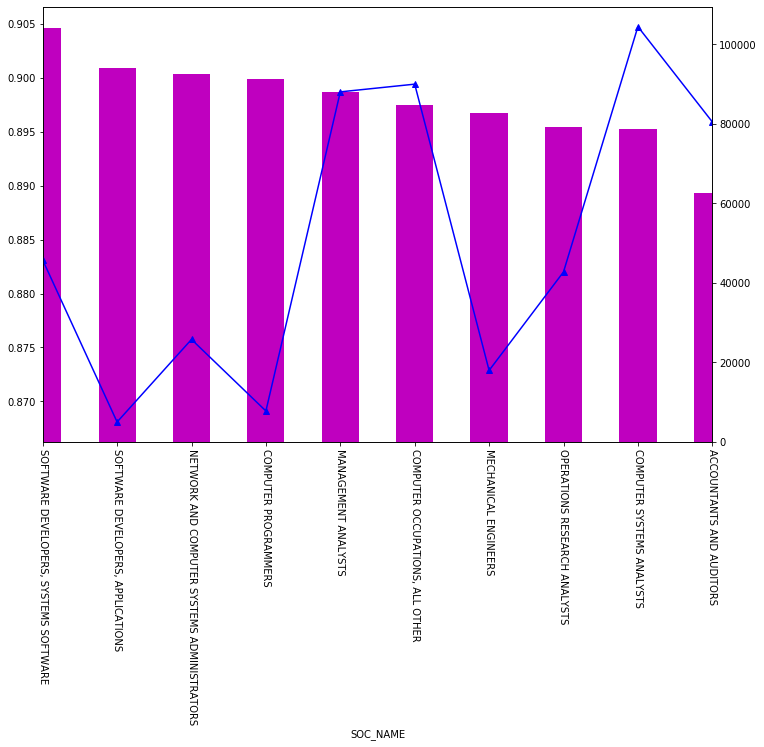

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()

# bars represents average salary
df_soc['avg. salary'].plot(kind='bar', color='m', ax=ax1)

# the line represents the percentage of each occupation among certified applicants
df_soc['likelihood'].plot(kind='line',color='blue', marker='^',ax=ax2)
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

for item in ax1.get_xticklabels():
    item.set_rotation(270)

### Question 6 : Does having a H1B dependent employer affect the case status of the Labor Condition Application negatively? 


As part of H-1 processing, first step is to file LCA and wait for the approvement of the U.S. Department of Labor Employment.

Case Status:

Certified: Employer filed the LCA, which was approved by DOL

Certified Withdrawn: LCA was approved but later withdrawn by employer

Withdrawn: LCA was withdrawn by employer before approval

Denied: LCA was denied by DOL

H-1B Dependent：
An “H-1B Dependent Employer” is a U.S. employer that hires a higher amount of H-1B employees than the normal standard. 

Y = Employer is H-1B Dependent; N = Employer is not H-1B Dependent.  
So we are trying to understand how being employed by an H1-B Dependent company affects the chances of getting the LCA approved.

In [ ]:
# check case status first
df5 = df.loc[:,['CASE_STATUS','VISA_CLASS','H1B_DEPENDENT']]
df5['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

Create a table of the number of cases grouped by H1B dependent situation and case status seperately.


In [ ]:
dependent_case_DF = pd.DataFrame(df.groupby(['H1B_DEPENDENT','CASE_STATUS']).size())
dependent_case_DF.rename(columns = {0:'Count'},inplace=True)
dependent_case_DF.reset_index(inplace = True)
dependent_case_DF

,H1B_DEPENDENT,CASE_STATUS,Count
0,N,CERTIFIED,323931
1,N,CERTIFIED-WITHDRAWN,31451
2,N,DENIED,6042
3,N,WITHDRAWN,14064
4,Y,CERTIFIED,208739
5,Y,CERTIFIED-WITHDRAWN,17253
6,Y,DENIED,1343
7,Y,WITHDRAWN,6195


Create a grouped bar plot to observe all cases status

In [ ]:
#use plotly to make interactive plot
fig = go.Figure(data=[
        go.Bar(name='Dependent', 
               text=dependent_case_DF[dependent_case_DF.H1B_DEPENDENT == 'Y'].Count ,
               textposition='outside',
               x=dependent_case_DF[dependent_case_DF.H1B_DEPENDENT == 'Y'].CASE_STATUS, 
               y=dependent_case_DF[dependent_case_DF.H1B_DEPENDENT == 'Y'].Count),
                    
    go.Bar(name='Nor Dependent',
           text= dependent_case_DF[dependent_case_DF.H1B_DEPENDENT == 'N'].Count,
           textposition='outside',
           x=dependent_case_DF[dependent_case_DF.H1B_DEPENDENT == 'N'].CASE_STATUS, 
           y=dependent_case_DF[dependent_case_DF.H1B_DEPENDENT == 'N'].Count),
] 
               )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.layout.update(uniformtext_minsize=8, uniformtext_mode='hide')
fig.layout.update(
    title='Case Status of H1-B Applicatoin with/without Dependent ',
    xaxis=dict(
        title='Case Status',
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
        title='Number of application',
        titlefont_size=16,
        tickfont_size=14)
    )

# Change the bar mode
fig.layout.update(barmode='group')

fig.show()

Converting the graph and showing it in terms of percentage of the total cases, to better understand the data.

In [ ]:
#dependent_case_DF['Count'].unique()
N_count = [323931, 31451,   6042,  14064]
Y_count = [208739, 17253,   1344,   6195]
N_percertange = [i/375488 for i,j in zip(N_count,Y_count)]

Y_percertange = [j/233531 for i,j in zip(N_count,Y_count)]

In [ ]:
fig = go.Figure(data=[
        go.Bar(name='Dependent',
               text=[round(100*i,2) for i in Y_percertange],
               textposition='outside',               
               x=dependent_case_DF[dependent_case_DF.H1B_DEPENDENT == 'Y'].CASE_STATUS, 
               y=Y_percertange),
    go.Bar(name='Not Dependent', 
           text=[round(100*j,2) for j in N_percertange],
           textposition='outside',               
           x=dependent_case_DF[dependent_case_DF.H1B_DEPENDENT == 'N'].CASE_STATUS, 
           y=N_percertange),
])

fig.update_layout(
    title='Case Status of H1-B Applicatoin in corresponding Dependent group',
    xaxis=dict(
        title='Case Status',
        titlefont_size=16,
        tickfont_size=14),
    yaxis=dict(
        title='Percentage of applicatoin',
        titlefont_size=16,
        tickfont_size=14)
    )

fig.layout.yaxis.tickformat = ',.0%'

# Change the bar mode
fig.update_layout(barmode='group')


# Section 5: Conclusion

After performing analysis around various research questions and taking into consideration the whole data we came up with following conclusions: 

One should target comapanies such as INFOSYS LIMITED, TATA CONSULTANCY SERVICES LIMITED, CAPGEMINI AMERICA INC, IBM INDIA PRIVATE LIMITED, TECH MAHINDRA (AMERICAS)INC., DELOITTE CONSULTING LLP, ACCENTURE LLP, ERNST & YOUNG U.S. LLP, WIPRO LIMITED, GOOGLE INC at their US office. These are huge multi-national companies and they have good immigration team that can take care of your visa and status.

Going by the demographics, California, Texas and New Jersey are home to various multi-national and domestic companies which apply for the most number of H1-B visa across the US.

Candidates working in the following roles, Software Developers, Computer Systems analyst, Computer Programmers, computer occupations, Management Analyst have the highest chances of getting their LCA approved for their H1-B petition. 

In general, technical occupations are paid similarly, around 90,000 dollars per year. As for other positions such as finalcial, marketing or operation-related positions pays slightly less, at around 80,000 per year. These fields require a certain amount of professional knowledge, problem solving abilities and techinical skills, while the level of knowledge is not as prohibiting as highly technical occupations mentioned above.

H1-B Dependent employers have a higher approval rate(89.3%) than employers that are not H1-B Dependent. This shows that having a H1-B Dependent employer increases our chances of getting approved.





### Recommendations: 

After thorough analysis of the data, we would like to recommend that if you are a prospective student looking to pursue Master's in the US, pursuing a technial course, targeting companies like INFOSYS LIMITED, TATA CONSULTANCY SERVICES LIMITED, CAPGEMINI AMERICA INC, IBM INDIA PRIVATE LIMITED, TECH MAHINDRA (AMERICAS)INC in their California, Texas or New jersery offices, will have highest chances of LCA approval. 
For people already working in the US, they should apply to the above mentioned companies and try to get a job there in order to apply for their H1-B.